In [2]:
import numpy as np 
import pandas as pd 

In [3]:
#1.Загрузить файл HR.csv в pandas dataframe
hr = pd.read_csv('HR.csv')
hr.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#2.Рассчитать основные статистики для переменных

#посмотрим есть ли пропуски в данных
hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#разделим данные на количественные и категориальные переменные

hr_quantit = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',]]              
hr_qualit = hr[['Work_accident','left','promotion_last_5years','department','salary']]

In [6]:
#основные статистики для количественных переменных
hr_quantit.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [7]:
#значение моды для категориальных переменных
hr_qualit.mode()

,Work_accident,left,promotion_last_5years,department,salary
0,0,0,0,sales,low


In [8]:
#3.Рассчитать и визуализировать корреляционную матрицу для количественных переменных.
#посчитаем коэффициенты корреляции между переменными
hr_quantit.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

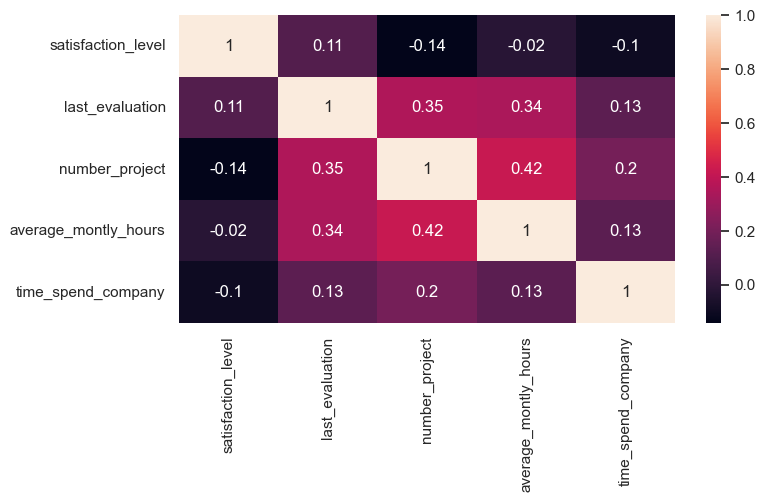

In [10]:
sns.set(rc={'figure.figsize':(8, 4)})
sns.heatmap(hr_quantit.corr(), annot=True)

In [11]:
#3.1.Определите две самые скоррелированные и две наименее скоррелированные переменные
'''самые скоррелированные переменные average_montly_hours(Среднее количество часов на рабочем месте в месяц) 
и number_projects(Количество проектов, выполненных за время работы)'''

'''наименее скоррелированные переменные average_montly_hours (Среднее количество часов на рабочем месте в месяц)
и  satisfaction_level(Уровень удовлетворенности работой)'''

'наименее скоррелированные переменные average_montly_hours (Среднее количество часов на рабочем месте в месяц)\nи  satisfaction_level(Уровень удовлетворенности работой)'

In [12]:
#4.Рассчитайте сколько сотрудников работает в каждом департаменте.
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'low'), Text(1, 0, 'medium'), Text(2, 0, 'high')])

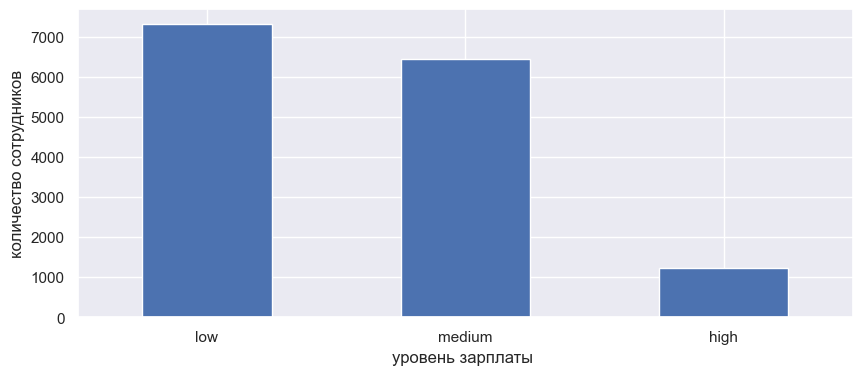

In [13]:
#5.Показать распределение сотрудников по зарплатам.
hr_ = hr['salary'].value_counts()

hr_.plot(kind='bar',
         grid=True,
         figsize = (10, 4),
         xlabel='уровень зарплаты ',
         ylabel='количество сотрудников')
plt.xticks (rotation = 0)

In [15]:
#6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности


low = hr[hr['salary'] == 'low']#сотрудники с низкой зарплатой
low_ = low.groupby('department').agg(count_emp_low = ('department', 'count')).reset_index()


medium = hr[hr['salary'] == 'medium']#сотрудники со средней зарплатой
medium_ = medium.groupby('department').agg(count_emp_medium = ('department', 'count')).reset_index()

high = hr[hr['salary'] == 'high']#сотрудники с высокой зарплатой
high_ = high.groupby('department').agg(count_emp_high= ('department', 'count')).reset_index()

#распределение сотрудников по зарплатам
Total_empl = low_.merge(medium_,on='department',how = 'outer').merge(high_,on='department',how = 'outer')
Total_empl


,department,count_emp_low,count_emp_medium,count_emp_high
0,IT,609,535,83
1,RandD,364,372,51
2,accounting,358,335,74
3,hr,335,359,45
4,management,180,225,225
5,marketing,402,376,80
6,product_mng,451,383,68
7,sales,2099,1772,269
8,support,1146,942,141
9,technical,1372,1147,201


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

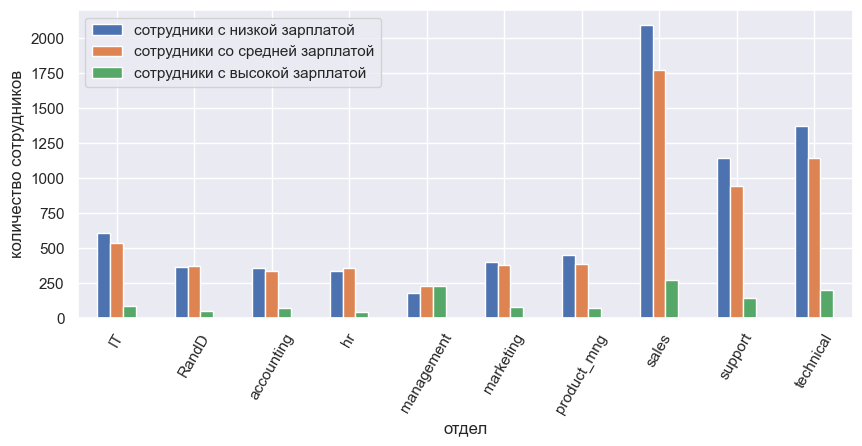

In [16]:
Total_empl.plot(kind='bar',
                x ='department',
                grid=True,
                figsize = (10, 4),
                xlabel='отдел',
                ylabel='количество сотрудников')
plt.legend(['сотрудники с низкой зарплатой',
            'сотрудники со средней зарплатой',
            'сотрудники с высокой зарплатой'],loc='upper left')
plt.xticks (rotation = 60)

Text(0.5, 0, 'уровень зарплаты')

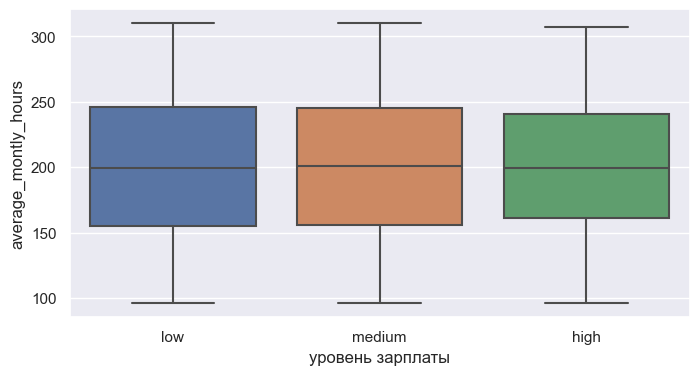

In [19]:
#7.Проверить гипотезу, что сотрудники с высоким окладом
#проводят на работе больше времени, чем сотрудники с низким окладом


sns.boxplot(data=hr, x='salary', y='average_montly_hours')
plt.xlabel('уровень зарплаты') 

# в среднем сотрудники с низким окладом и сотрудники с высоким окладом проводят на работе одинаковое количество времени.


    

Text(0, 0.5, 'количество сотрудников')

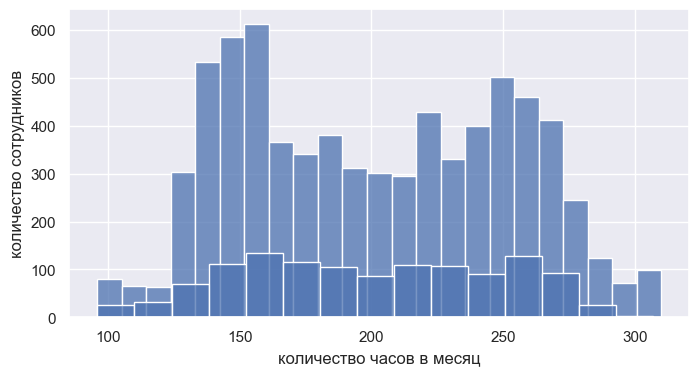

In [27]:
#распределение сотрудников с низким и высоким окладом по количеству часов в месяц
sns.histplot(low['average_montly_hours'])
sns.histplot(high['average_montly_hours'])
plt.xlabel('количество часов в месяц')
plt.ylabel('количество сотрудников')


In [28]:
from scipy import stats
low_h = low['average_montly_hours']
high_h = high['average_montly_hours']
fvalue, pvalue = stats.f_oneway(low_h, high_h)

print(f' p = {pvalue: .3f}')

if pvalue > 0.05:
    print('средние, вероятно, одинаковые')
else:
    print('средние, вероятно, отличаются')

 p =  0.466
средние, вероятно, одинаковые


In [29]:
#8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#● Доля сотрудников с повышением за последние 5 лет
#● Средняя степень удовлетворенности
#● Среднее количество проектов

#уволившиеся сотрудники
fired = hr[hr['left'] == 1]

#Сотрудники с повышением среди уволившихся за последние 5 лет
fired_promotion = fired[fired['promotion_last_5years'] == 1 ]

#Доля сотрудников среди уволившихся с повышением за последние 5 лет
per_f_pro =round(((len(fired_promotion)/len(fired))*100),3)

#Средняя степень удовлетворенности среди уволившихся
asl_f = round(fired['satisfaction_level'].mean(),3)

#Среднее количество проектов среди уволившихся
anp_f = round(fired['number_project'].mean(),3)

#неуволившиеся сотрудники
nonfired = hr[hr['left'] == 0]

#Сотрудники с повышением среди неуволившихся за последние 5 лет
nonfired_promotion = nonfired[nonfired['promotion_last_5years'] == 1 ]

#Доля сотрудников среди неуволившихся с повышением за последние 5 лет
per_nf_pro = round(((len(nonfired_promotion)/len(nonfired))*100),3)

#Средняя степень удовлетворенности среди неуволившихся
asl_nf = round(nonfired['satisfaction_level'].mean(),3)

#Среднее количество проектов среди неуволившихся
anp_nf = round(fired['number_project'].mean(),3)

row1 = pd.Series(['Доля сотрудников с повышением за последние 5 лет, в %',per_f_pro, per_nf_pro])
row2 = pd.Series(['Средняя степень удовлетворенности', asl_f, asl_nf])
row3 = pd.Series(['Среднее количество проектов', anp_f, anp_nf])


values = pd.DataFrame([row1, row2, row3])
values.columns = ['показатели','уволившиеся сотрудники', 'неуволившиеся сотрудники']
pd.set_option('max_colwidth', 100)
#показатели среди уволившихся и неуволившихся сотрудников
values

,показатели,уволившиеся сотрудники,неуволившиеся сотрудники
0,"Доля сотрудников с повышением за последние 5 лет, в %",0.532,2.625
1,Средняя степень удовлетворенности,0.440,0.667
2,Среднее количество проектов,3.856,3.856


In [30]:
#9.Разделить данные на тестовую и обучающую выборки
#Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
#Оценить качество модели на тестовой выборке

#удалим столбцы department и salary 
hr_ = hr.drop(['department','salary'], axis = 1)
hr_


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [34]:
#Построим модель LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X = hr_[['satisfaction_level',
         'last_evaluation',
         'number_project',
         'average_montly_hours',
         'time_spend_company',
         'Work_accident',
         'promotion_last_5years']]

y = hr_['left']

In [35]:
from sklearn.model_selection import train_test_split
# разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=45, test_size=0.33)

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [36]:
#оценим точность 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7640404040404041